<a href="https://colab.research.google.com/github/kake08/chembl_ml/blob/main/code/CDD_ML_Part_4_Regression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a regression model of replicase_polyprotein_1ab  using the random forest algorithm.

# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load Dataset

pubchem fingerprints containing bioactivity data

In [2]:
df = pd.read_csv('/content/replicase_polyprotein_1ab_bioactivity_data_2class_pIC50_pubchem_fp.csv')

lipinski vs fingerprints?

lipinski - quick overview of PK of molecules. Passing lipinski's rule of 5 will make good drug compounds. describes the global features of molecules e.g. size, solubility, h donors and acceptors

fingerprints - local features - each molecule described by the unique building block of molecule. How the molecule is structured e.g. connectivity, arising the unique structure of molecule and unique properties. Some molecule arrangement have better potency toward protein target whilst also being safe and not toxic.

# Input features

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4029,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4030,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4031,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Output Features

IC50 is the inhibition concentration at 50%.
pIC50(target) is the negative logarithm of the IC50 value.

In [5]:
Y = df.pIC50
Y

,pIC50
0,6.408935
1,6.677781
2,7.096910
3,7.397940
4,6.443697
...,...
4028,7.000000
4029,6.259637
4030,7.000000
4031,7.000000


# Data Dimensions

In [7]:
X.shape

(4033, 881)

In [8]:
Y.shape

(4033,)

# Remove low variance features

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [10]:
X.shape

(4033, 164)

# Data Split (80/20) ratio

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((3226, 164), (3226,))

In [13]:
X_test.shape, Y_test.shape

((807, 164), (807,))

# Building a Regression model using Random Forest

In [22]:
import numpy as np
np.random.seed(42)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5871131129577126

In [23]:
Y_pred = model.predict(X_test)

# Scatter plot of Experimental vs Predicted pIC50 values

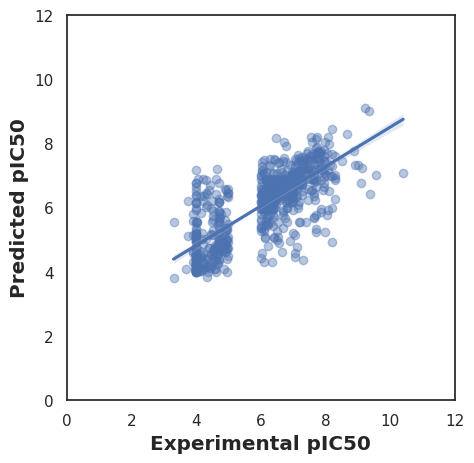

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

This scatter plot shows how well our model predicts pIC50 values compared to the actual ones. The upward-sloping trend indicates a positive correlation, meaning our model generally predicts higher values for higher actual values. However, with an R-squared of 0.59, only about 59% of the variation in actual values is explained, suggesting a moderate fit. The scattered points around the line show that while the model captures the overall trend, its predictions aren't perfectly accurate, revealing some unexplained error. Ideally, all points would fall perfectly on the line for flawless prediction.